In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report
import joblib
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
try:
    # Try loading the file from your laptop path
    df = pd.read_csv('C:/Users/Eugene/Documents/GitHub/TSDN-BoyWithLuv/Source/Prototype/New/front_service_1.csv')
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    df = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TSDN-BoyWithLuv/Source/Prototype/New/front_service_1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   death     9105 non-null   int64  
 1   hospdead  9105 non-null   int64  
 2   sfdm2     7705 non-null   object 
 3   age       9105 non-null   float64
 4   sex       9105 non-null   object 
 5   dzgroup   9105 non-null   object 
 6   dzclass   9105 non-null   object 
 7   num.co    9105 non-null   int64  
 8   edu       7471 non-null   float64
 9   income    6123 non-null   object 
 10  scoma     9104 non-null   float64
 11  charges   8933 non-null   float64
 12  totcst    8217 non-null   float64
 13  totmcst   5630 non-null   float64
 14  avtisst   9023 non-null   float64
 15  race      9063 non-null   object 
 16  sps       9104 non-null   float64
 17  aps       9104 non-null   float64
 18  surv2m    9104 non-null   float64
 19  surv6m    9104 non-null   float64
 20  hday      9105 non-null   int6

In [4]:
df.sample(10)

,death,hospdead,sfdm2,age,sex,dzgroup,dzclass,num.co,edu,income,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
8365,0,0,no(M2 and SIP pres),40.93597,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,12.0,$11-$25k,...,0.199982,7.299805,129.0,7.349609,NaN,NaN,NaN,0.0,0.0,0.000000
500,1,1,<2 mo. follow-up,49.91599,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,14.0,>$50k,...,1.000000,0.599976,136.0,7.500000,NaN,NaN,NaN,NaN,NaN,3.306152
4324,0,0,no(M2 and SIP pres),67.56494,male,CHF,COPD/CHF/Cirrhosis,3,14.0,$25-$50k,...,NaN,1.599854,142.0,7.359375,111.0,21.0,1300.0,0.0,0.0,0.000000
3724,1,0,no(M2 and SIP pres),60.55298,male,ARF/MOSF w/Sepsis,ARF/MOSF,3,7.0,$11-$25k,...,NaN,2.699707,151.0,7.409180,NaN,NaN,NaN,NaN,1.0,1.000000
1373,0,0,NaN,50.40097,male,ARF/MOSF w/Sepsis,ARF/MOSF,0,9.0,NaN,...,NaN,NaN,140.0,NaN,NaN,NaN,1550.0,NaN,NaN,1.853027
937,0,0,adl>=4 (>=5 if sur),54.00400,female,ARF/MOSF w/Sepsis,ARF/MOSF,4,12.0,$25-$50k,...,4.500000,3.599609,142.0,7.359375,163.0,95.0,525.0,NaN,1.0,1.000000
7727,1,1,<2 mo. follow-up,59.75400,male,ARF/MOSF w/Sepsis,ARF/MOSF,3,12.0,under $11k,...,0.500000,0.699951,133.0,7.500000,72.0,9.0,1275.0,NaN,7.0,7.000000
4562,1,1,<2 mo. follow-up,66.59497,female,Cirrhosis,COPD/CHF/Cirrhosis,2,14.0,NaN,...,10.599609,0.699951,141.0,7.479492,85.0,16.0,1430.0,NaN,7.0,7.000000
1108,1,0,no(M2 and SIP pres),77.40497,female,Colon Cancer,Cancer,2,18.0,>$50k,...,NaN,1.000000,137.0,NaN,171.0,8.0,3300.0,0.0,0.0,0.000000
7814,1,0,NaN,63.52597,female,Lung Cancer,Cancer,2,14.0,>$50k,...,0.399963,0.699951,137.0,NaN,NaN,NaN,NaN,1.0,2.0,2.000000


In [5]:
df.rename(columns={
    'death':'death_outside_hospital',
    'hospdead':'death_inside_hospital',
    'age': 'age_years',
    'sex': 'gender',
    'dzgroup': 'disease_group',
    'dzclass': 'disease_class',
    'num.co': 'num_comorbidities',
    'edu': 'education_years',
    'income': 'income_range',
    'scoma': 'coma_score',
    'charges': 'hospital_charges',
    'totcst': 'total_cost_to_charges_ratio',
    'totmcst': 'total_micro_cost',
    'avtisst': 'avg_tiss_score',
    'race': 'race_ethnicity',
    'sps': 'support_physiology_score',
    'aps': 'apache_score',
    'surv2m': 'survival_2_months',
    'surv6m': 'survival_6_months',
    'hday': 'hospital_day_of_study_entry',
    'diabetes': 'has_diabetes',
    'dementia': 'has_dementia',
    'ca': 'cancer_status',
    'prg2m': 'physician_survival_2_months',
    'prg6m': 'physician_survival_6_months',
    'dnr': 'do_not_resuscitate_status',
    'dnrday': 'day_of_dnr_order',
    'meanbp': 'mean_arterial_bp',
    'wblc': 'white_blood_cell_count',
    'hrt': 'heart_rate',
    'resp': 'respiratory_rate',
    'temp': 'body_temperature_celsius',
    'pafi': 'pao2_fio2_ratio',
    'alb': 'serum_albumin',
    'bili': 'bilirubin_level',
    'crea': 'serum_creatinine',
    'sod': 'serum_sodium',
    'ph': 'blood_ph',
    'glucose': 'glucose_level',
    'bun': 'blood_urea_nitrogen',
    'urine': 'urine_output',
    'adlp': 'adl_index_patient',
    'adls': 'adl_index_surrogate',
    'sfdm2': 'functional_disability_level',
    'adlsc': 'calibrated_adl_index_surrogate'
}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   death_outside_hospital          9105 non-null   int64  
 1   death_inside_hospital           9105 non-null   int64  
 2   functional_disability_level     7705 non-null   object 
 3   age_years                       9105 non-null   float64
 4   gender                          9105 non-null   object 
 5   disease_group                   9105 non-null   object 
 6   disease_class                   9105 non-null   object 
 7   num_comorbidities               9105 non-null   int64  
 8   education_years                 7471 non-null   float64
 9   income_range                    6123 non-null   object 
 10  coma_score                      9104 non-null   float64
 11  hospital_charges                8933 non-null   float64
 12  total_cost_to_charges_ratio     82

In [7]:
functional_disability_level_mapping = {
    '<2 mo. follow-up': 1, 
    'no(M2 and SIP pres)': 2, 
    'SIP>=30': 3,
    'adl>=4 (>=5 if sur)': 4, 
    'Coma or Intub':5 
}

gender_mapping = {
    'male': 1, 
    'female': 2
}

disease_group_mapping = {
    'Lung Cancer': 1,
    'Cirrhosis': 2,
    'ARF/MOSF w/Sepsis': 3,
    'Coma': 4,
    'CHF': 5,
    'Colon Cancer': 6,
    'COPD': 7,
    'MOSF w/Malig': 8
}

disease_class_mapping = {
    'Cancer': 1,
    'COPD/CHF/Cirrhosis': 2,
    'ARF/MOSF': 3,
    'Coma': 4
}

income_range_mapping = {
    '$11-$25k': 1,
    'under $11k': 2,
    '$25-$50k': 3,
    '>$50k': 4
}

race_ethnicity_mapping = {
    'other': 1,
    'white': 2,
    'black': 3,
    'hispanic': 4,
    'asian': 5
}

cancer_status_mapping = {
    'metastatic': 1,
    'no': 0,
    'yes': 2
}

dnr_status_mapping = {
    'no dnr': 0,
    'dnr after sadm': 1,
    'dnr before sadm': 2
}

In [8]:
df['functional_disability_level'] = df['functional_disability_level'].map(functional_disability_level_mapping)
df['gender'] = df['gender'].map(gender_mapping)
df['disease_group'] = df['disease_group'].map(disease_group_mapping)
df['disease_class'] = df['disease_class'].map(disease_class_mapping)
df['income_range'] = df['income_range'].map(income_range_mapping)
df['race_ethnicity'] = df['race_ethnicity'].map(race_ethnicity_mapping)
df['cancer_status'] = df['cancer_status'].map(cancer_status_mapping)
df['do_not_resuscitate_status'] = df['do_not_resuscitate_status'].map(dnr_status_mapping)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   death_outside_hospital          9105 non-null   int64  
 1   death_inside_hospital           9105 non-null   int64  
 2   functional_disability_level     7705 non-null   float64
 3   age_years                       9105 non-null   float64
 4   gender                          9105 non-null   int64  
 5   disease_group                   9105 non-null   int64  
 6   disease_class                   9105 non-null   int64  
 7   num_comorbidities               9105 non-null   int64  
 8   education_years                 7471 non-null   float64
 9   income_range                    6123 non-null   float64
 10  coma_score                      9104 non-null   float64
 11  hospital_charges                8933 non-null   float64
 12  total_cost_to_charges_ratio     82

In [10]:
stay_df = df[['hospital_day_of_study_entry', 
              'age_years', 
              'gender', 
            #   'adl_index_patient',
              'functional_disability_level', 
              'has_diabetes',
              'has_dementia',
              'cancer_status', 
              'num_comorbidities', 
              'disease_class']]

In [11]:
stay_df

,hospital_day_of_study_entry,age_years,gender,functional_disability_level,has_diabetes,has_dementia,cancer_status,num_comorbidities,disease_class
0,1,62.84998,1,NaN,0,0,1,0,1
1,3,60.33899,2,1.0,0,0,0,2,2
2,4,52.74698,2,1.0,0,0,0,2,2
3,1,42.38498,2,2.0,0,0,1,2,1
4,3,79.88495,2,2.0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...
9100,13,66.07300,1,NaN,0,0,0,1,3
9101,1,55.15399,2,NaN,0,0,0,1,4
9102,18,70.38196,1,NaN,0,0,0,1,3
9103,22,47.01999,1,1.0,0,0,2,1,3


In [12]:
stay_df['age_years'] = stay_df['age_years'].astype(int)

In [13]:
stay_df

,hospital_day_of_study_entry,age_years,gender,functional_disability_level,has_diabetes,has_dementia,cancer_status,num_comorbidities,disease_class
0,1,62,1,NaN,0,0,1,0,1
1,3,60,2,1.0,0,0,0,2,2
2,4,52,2,1.0,0,0,0,2,2
3,1,42,2,2.0,0,0,1,2,1
4,3,79,2,2.0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...
9100,13,66,1,NaN,0,0,0,1,3
9101,1,55,2,NaN,0,0,0,1,4
9102,18,70,1,NaN,0,0,0,1,3
9103,22,47,1,1.0,0,0,2,1,3


In [14]:
stay_df.isnull().sum()

hospital_day_of_study_entry       0
age_years                         0
gender                            0
functional_disability_level    1400
has_diabetes                      0
has_dementia                      0
cancer_status                     0
num_comorbidities                 0
disease_class                     0
dtype: int64

In [15]:
stay_df['functional_disability_level'].describe()

count    7705.000000
mean        1.921609
std         0.997963
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: functional_disability_level, dtype: float64

In [16]:
stay_df['functional_disability_level'] = stay_df['functional_disability_level'].fillna(2)

In [17]:
stay_df.isnull().sum()

hospital_day_of_study_entry    0
age_years                      0
gender                         0
functional_disability_level    0
has_diabetes                   0
has_dementia                   0
cancer_status                  0
num_comorbidities              0
disease_class                  0
dtype: int64

In [18]:
stay_df['hospital_day_of_study_entry'].describe()

count    9105.000000
mean        4.400000
std         9.126811
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       148.000000
Name: hospital_day_of_study_entry, dtype: float64

<Axes: >

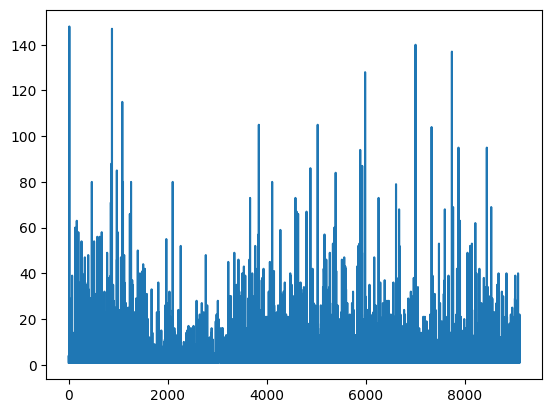

In [19]:
stay_df['hospital_day_of_study_entry'].plot()

In [20]:
# Define parameter grids for both models
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

In [21]:
# Define features and target variable
x = stay_df.drop("hospital_day_of_study_entry", axis=1)
y = stay_df["hospital_day_of_study_entry"]

In [22]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Random Forest

In [23]:
rf_model = RandomForestRegressor(random_state=42)

In [24]:
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [25]:
rf_grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [26]:
rf_best_model = rf_grid.best_estimator_

In [27]:
y_pred = rf_best_model.predict(x_test)

In [28]:
# Metrics Calculations
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE (square root of MSE)
rf_r2 = r2_score(y_test, y_pred)  # R² score

# Print all metrics
print(f"Random Forest Model - Best Metrics:")
print(f"  MSE: {rf_mse:.4f}")
print(f"  RMSE: {rf_rmse:.4f}")
print(f"  R²: {rf_r2:.4f}")

Random Forest Model - Best Metrics:
  MSE: 85.9035
  RMSE: 9.2684
  R²: 0.0601


## XGBoost

In [29]:
xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')

In [30]:
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [31]:
xgb_grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [32]:
xgb_best_model = xgb_grid.best_estimator_

In [33]:
y_pred = xgb_best_model.predict(x_test)

In [34]:
# Metrics Calculations
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE (square root of MSE)
xgb_r2 = r2_score(y_test, y_pred)  # R² score

# Print all metrics
print(f"XGBoost Model - Best Metrics:")
print(f"  MSE: {xgb_mse:.4f}")
print(f"  RMSE: {xgb_rmse:.4f}")
print(f"  R²: {xgb_r2:.4f}")

XGBoost Model - Best Metrics:
  MSE: 82.5791
  RMSE: 9.0873
  R²: 0.0965


In [ ]:
def evaluate_and_export_best_model(rf_model, xgb_model, x_test, y_test, export_path='models'):
    # Predict and evaluate Random Forest model
    rf_preds = rf_model.predict(x_test)
    rf_mse = mean_squared_error(y_test, rf_preds)
    rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)  # RMSE
    rf_r2 = r2_score(y_test, rf_preds)  # R² score
    
    print("\nRandom Forest Model Evaluation:")
    print(f"MSE: {rf_mse:.4f}")
    print(f"RMSE: {rf_rmse:.4f}")
    print(f"R²: {rf_r2:.4f}")
    
    # Predict and evaluate XGBoost model
    xgb_preds = xgb_model.predict(x_test)
    xgb_mse = mean_squared_error(y_test, xgb_preds)
    xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)  # RMSE
    xgb_r2 = r2_score(y_test, xgb_preds)  # R² score
    
    print("\nXGBoost Model Evaluation:")
    print(f"MSE: {xgb_mse:.4f}")
    print(f"RMSE: {xgb_rmse:.4f}")
    print(f"R²: {xgb_r2:.4f}")
    
    # Compare models and select the best based on MSE (lower is better)
    if rf_mse < xgb_mse:
        best_model = rf_model
        model_name = 'Random Forest'
        file_name = f'{export_path}/best_random_forest_model.joblib'
    else:
        best_model = xgb_model
        model_name = 'XGBoost'
        file_name = f'{export_path}/best_xgboost_model.joblib'
    
    # Save the best model using joblib
    joblib.dump(best_model, file_name)
    print(f"\nBest model ({model_name}) saved as {file_name}.")

In [36]:
def evaluate_and_export_best_model(rf_model, xgb_model, x_test, y_test, export_path='models'):
    # Predict and evaluate Random Forest model
    rf_preds = rf_model.predict(x_test)
    rf_mse = mean_squared_error(y_test, rf_preds)
    rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)  # RMSE
    rf_r2 = r2_score(y_test, rf_preds)  # R² score
    
    print("\nRandom Forest Model Evaluation:")
    print(f"MSE: {rf_mse:.4f}")
    print(f"RMSE: {rf_rmse:.4f}")
    print(f"R²: {rf_r2:.4f}")
    
    # Predict and evaluate XGBoost model
    xgb_preds = xgb_model.predict(x_test)
    xgb_mse = mean_squared_error(y_test, xgb_preds)
    xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)  # RMSE
    xgb_r2 = r2_score(y_test, xgb_preds)  # R² score
    
    print("\nXGBoost Model Evaluation:")
    print(f"MSE: {xgb_mse:.4f}")
    print(f"RMSE: {xgb_rmse:.4f}")
    print(f"R²: {xgb_r2:.4f}")
    
    # Compare models and select the best based on MSE (lower is better)
    if rf_mse < xgb_mse:
        best_model = rf_model
        model_name = 'Random Forest'
        file_name = 'stay_rf.joblib'
    else:
        best_model = xgb_model
        model_name = 'XGBoost'
        file_name = 'stay_xgb.joblib'
    
    # Save the best model using joblib
    joblib.dump(best_model, file_name)
    print(f"\nBest model ({model_name}) saved as {file_name}.")


In [37]:
evaluate_and_export_best_model(rf_best_model, xgb_best_model, x_test, y_test)


Random Forest Model Evaluation:
MSE: 85.9035
RMSE: 9.2684
R²: 0.0601

XGBoost Model Evaluation:
MSE: 82.5791
RMSE: 9.0873
R²: 0.0965

Best model (XGBoost) saved as stay_xgb.joblib.


and all these variables are included in the logic creation on new column 'surgery risk', which will be used as the target latter on (there will be 3 category risk, Low, Moderate, High)